In [5]:
import sys, os
import numpy as np
import pandas as pd

from IPython.display import Image, display_png




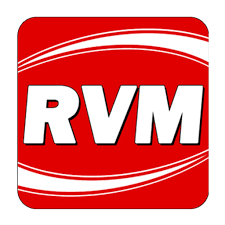

In [2]:
Image(filename="abc.png")

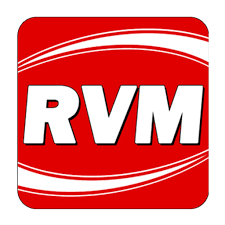

In [6]:
display_png(Image(filename="abc.png"))